<a href="https://colab.research.google.com/github/lynnbauerm/2025_Intro_Python/blob/main/notebook/W2_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercise) Ocean Floats Data Analysis

**Learning Objectives**

*    Creating new arrays using `linspace` and `arange`
*    Computing basic formulas with `numpy` arrays
*    Loading data from `.npy` files
*    Performing reductions (e.g. `mean`, `std` on `numpy` arrays)
*    Making 1D line plots
*    Making scatterplots
*    Annotating plots with titles and axes

In this problem, we use real data from ocean profiling floats. [ARGO](http://www.argo.ucsd.edu/) floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. [ARGO](http://www.argo.ucsd.edu/) floats collect one “profile” (a set of messurements at different depths or “levels”).

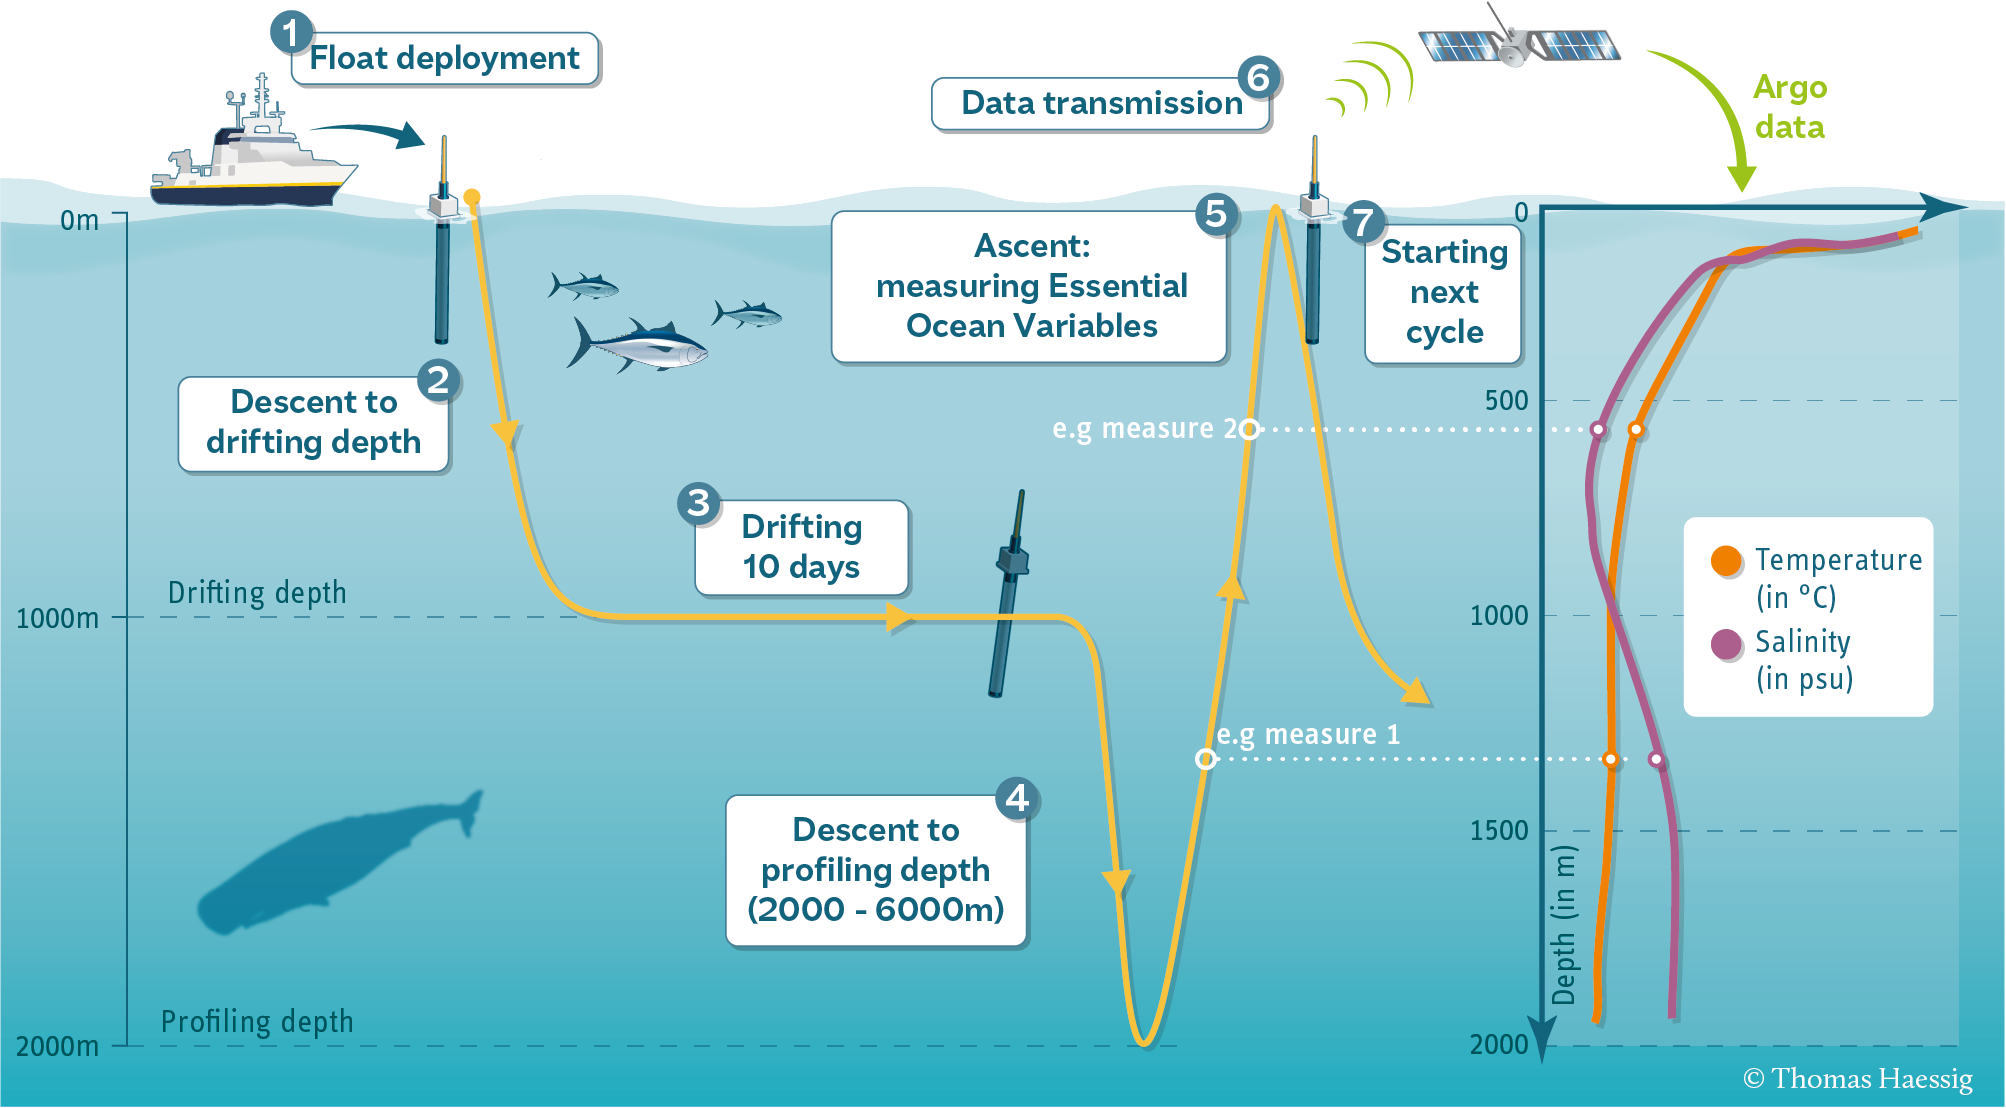


Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let’s start by using [pooch](https://www.fatiando.org/pooch/latest/) to download the data files we need for this exercise. The following code will give you a list of `.npy` files that you can open in the next step.

In [3]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy']

In [7]:
import numpy as np

**Q1) Load each data file as a `numpy` array.**

You can use whatever names you want for your arrays, but we recommend:

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

Hint 1: Look at the file name (the items in `files`) to know which files corresponds to which variable.

Hint 2: Check out the documentation for [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Display the names of the items in files here

In [41]:

#print(s) #il faut prendre cette fonction et prendre la pos de la ligne
lat = np.load(files[0])
S = np.load(files[1])
lev = np.load(files[2])
T = np.load(files[3])
lon = np.load(files[4])
date = np.load(files[5])
P = np.load(files[6])



Then, load the files as `numpy` arrays, for instance using list comprehension

In [44]:
# The files are in the following order: lat.npy, S.npy, levels.npy, T.npy, lon.npy, date.npy, P.npy
lat = np.load(files[0])
S = np.load(files[1])
level = np.load(files[2])
T = np.load(files[3])
lon = np.load(files[4])
date = np.load(files[5])
P = np.load(files[6])

**Q2) Recreate the `level` array using `np.arange` and `np.linspace`**

Hints:

*   The documentation for `np.arange` is [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
*   The documentation for `np.linspace` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
*   The documentation for `np.testing.assert_equal` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Display the `level` array

In [15]:
print(level)
x = 10.69999981 - 10.59999943
y = 1950.20007324 - 1949.70007324
z = 15.69999981  - 14.09999943
print(x,y, z) #pas de  pas régulier

[[   6.80000019    6.0999999     6.5        ...    7.0999999
     7.20000029    6.5       ]
 [  10.69999981   10.59999943   10.39999962 ...   10.79999924
    11.09999943   10.39999962]
 [  15.69999981   14.09999943   14.89999962 ...   15.89999962
    15.59999943   15.89999962]
 ...
 [1900.60009766 1900.         1900.19995117 ... 1899.70007324
  1900.40002441 1899.80004883]
 [1949.90002441 1950.         1949.89990234 ... 1950.59997559
  1950.20007324 1949.70007324]
 [1999.30004883 1998.         1998.5        ...           nan
  2000.40002441           nan]]
0.10000037999999911 0.5 1.6000003799999991


Recreate the `level` array using `np.arange` and call it `level_arange`

In [16]:
level_arange = np.arange(6.80000019, 2000.40002441, 0.5)
print(level_arange)


[   6.80000019    7.30000019    7.80000019 ... 1999.30000019 1999.80000019
 2000.30000019]


Check that `level` and `level_arange` are equal using `np.testing.assert_equal`

In [17]:
np.testing.assert_equal(level,level_arange)

AssertionError: 
Arrays are not equal

(shapes (78, 75), (3988,) mismatch)
 ACTUAL: array([[   6.8     ,    6.1     ,    6.5     , ...,    7.1     ,
           7.2     ,    6.5     ],
       [  10.7     ,   10.599999,   10.4     , ...,   10.799999,...
 DESIRED: array([   6.8,    7.3,    7.8, ..., 1999.3, 1999.8, 2000.3])

Recreate the `level` array using `np.linspace` and call it `level_linspace`

In [21]:
print(level.shape)
print(level.ndim)
print(level.size)
level_linspace = np.linspace(6.80000019, 2000.40002441, 5850)
print(level_linspace)

(78, 75)
2
5850
[   6.80000019    7.14084478    7.48168938 ... 1999.71833522 2000.05917982
 2000.40002441]


Check that `level` and `level_linspace` are equal using `np.testing.assert_equal`

In [22]:
#___.___(___,___)
np.testing.assert_equal(level,level_linspace)

AssertionError: 
Arrays are not equal

(shapes (78, 75), (5850,) mismatch)
 ACTUAL: array([[   6.8     ,    6.1     ,    6.5     , ...,    7.1     ,
           7.2     ,    6.5     ],
       [  10.7     ,   10.599999,   10.4     , ...,   10.799999,...
 DESIRED: array([   6.8     ,    7.140845,    7.481689, ..., 1999.718335,
       2000.05918 , 2000.400024])

**Q3) Examine the shapes of `T`, `S` and `P` compared to `lon`, `lat`, `date` and `level`. How do you think they are related?**

Hint: Check out the [NDArrays subsection](#NDArrays)

Display the shapes of all loaded variables

In [42]:
#check les shapes
print(level.shape)
print(T.shape)
print(S.shape)
print(P.shape)
print(date.shape)
print(lat.shape)
print(lon.shape)
#check autres
print(level.ndim)
print(T.ndim)
print(S.ndim)
print(P.ndim)
print(date.ndim)
print(lat.ndim)
print(lon.ndim)

(78,)
(78, 75)
(78, 75)
(78, 75)
(75,)
(75,)
(75,)
1
2
2
2
1
1
1


In [ ]:
___.___

pour le shape : level, S et date liés (78,75), T avec lat, lon
pour les dim: level, S, date liés; T, P, lat, lon liés
-> avant re changem du début

---



Based on the shapes, which dimensions do you think are shared among the arrays?

**Q4) Based on the formula below, calculate the seawater density `relative_density`, relative to pure water, as a function of the temperature, the salinity, and the pressure.**

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

where:

*    The densities $\rho$ and $ρ_{Pure\ Water}$ are in units $kg/m^{3}$.
*    The constants $a$, $b$, and $c$ are provided below.
*    The function to calculate the conservative temperature $\Theta$ (in units Celcius) from temperature, salinity, and pressure is provided below.
*    The temperature $T$ is in units Celcius.
*    The salinity $S$ is in units $g/kg$.
*    The pressure $p$ is in units $dbar$.

Hint: The loaded `numpy` arrays `temperature`, `salinity`, and `pressure` already have the right units and no conversion is needed.

Sources:

1) [*Roquet, Fabien, et al. "Defining a simplified yet “realistic” equation of state for seawater." Journal of Physical Oceanography 45.10 (2015): 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). [(License)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Below are the constants a, b, and c:

In [31]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

Let's import the library [`gsw`](https://teos-10.github.io/GSW-Python/) that contains the function `CS_from_t`to calculate the conservative temperature $\Theta$ from temperature, salinity, and pressure.

In [37]:
!pip install gsw
from gsw import CT_from_t

Now it's all up to you. Here's the equation to avoid having to scroll back up:

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculate the conservative temperature

Hint: use [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

In [46]:
CT = CT_from_t(T, S, P)

Calculate the `relative density` using the equation above

In [50]:
relative_density = a*S +b*CT +c*CT**2
print(relative_density)

[[18.36152674 18.3074983  18.34127024 ... 18.42715875 18.4688042
  18.39582104]
 [18.35542645 18.30967596 18.34171541 ... 18.41076618 18.35303668
  18.39580282]
 [18.36486576 18.31092749 18.34153802 ... 18.40115878 18.37679112
  18.39475388]
 ...
 [18.01515787 18.01831722 18.01809242 ... 18.02192599 18.02417064
  18.02719533]
 [18.02012438 18.0232203  18.02208142 ... 18.02588673 18.0270666
  18.03067945]
 [18.02598386 18.02798095 18.02760444 ...         nan 18.03207863
          nan]]


**Q4) Make a plot for each column of data in `T`, `S`, `P`, and
`relative_density` (four plots)**

For this question, we have to use the [Pyplot interface](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) of the [Matplotlib library](https://matplotlib.org/) for visualization even if we have not covered it extensively in class yet. But fear not as we provide easy-to-follow instructions below. 😊

The first step is to import Pyplot. Simply execute the code below.

In [51]:
import matplotlib.pyplot as plt

Then, we will plot variables as a function of the ocean depth, `level`. Simply read the documentation [at this link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to infer the correct syntax. Label your axes using `plt.xlabel` and `plt.ylabel`, and add a title using `plt.title`.

Hint: The vertical scale should use the `level` data to be consistent with oceanographic conventions.

Hint 2: Each plot should have a line for each column of data. It will look messy, like the plot below:

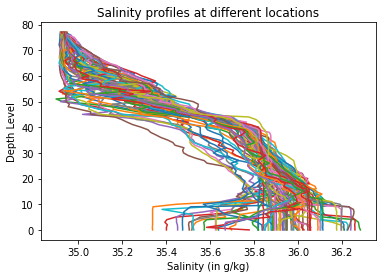

Text(0.5, 1.0, 'Temperature vs Level')

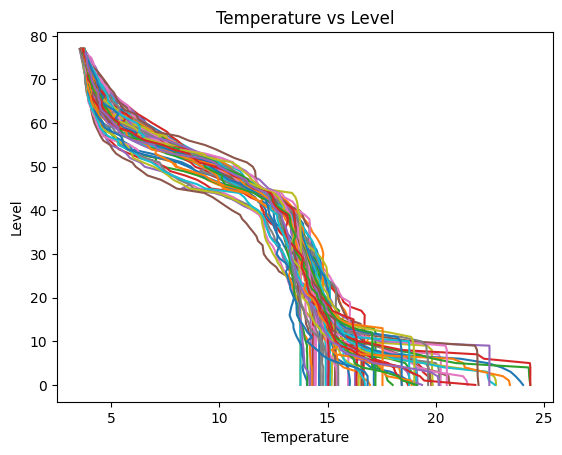

In [52]:
plt.plot(T, level); # The semi-colon prevents printing the line objects
plt.xlabel('Temperature') # Takes a string as argument
plt.ylabel('Level')
plt.title('Temperature vs Level')

Make more plots below:

Text(0.5, 1.0, 'Salinity vs Level')

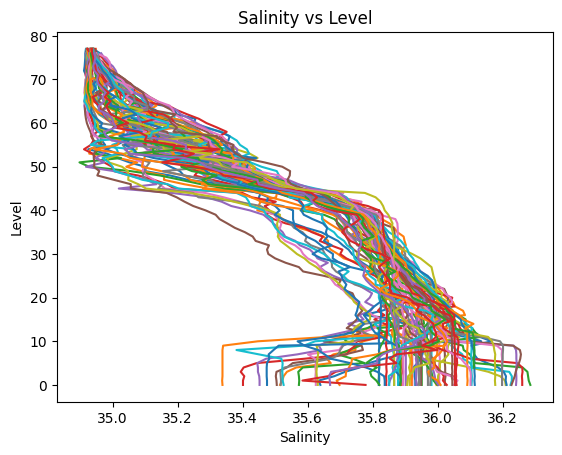

In [53]:
plt.plot(S, level);
plt.xlabel('Salinity')
plt.ylabel('Level')
plt.title('Salinity vs Level')

Text(0.5, 1.0, 'Pressure vs Level')

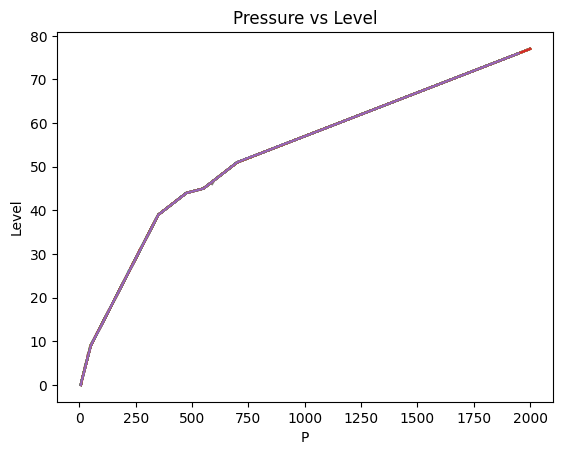

In [54]:
plt.plot(P, level);
plt.xlabel('P')
plt.ylabel('Level')
plt.title('Pressure vs Level')

Text(0.5, 1.0, 'Relative density vs Level')

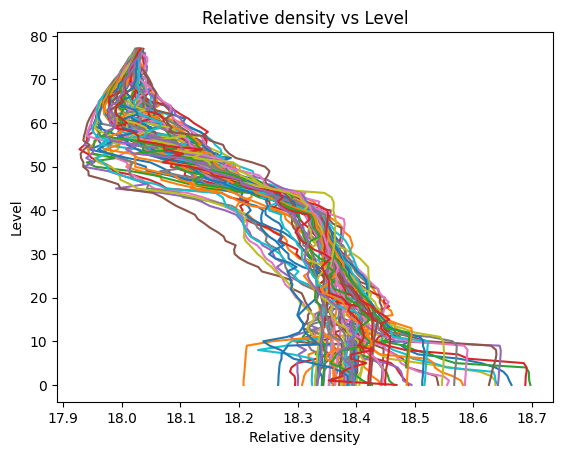

In [55]:
plt.plot(relative_density, level);
plt.xlabel('Relative density')
plt.ylabel('Level')
plt.title('Relative density vs Level')

**Q5) Compute the mean and standard deviation of each of `T`, `S`, `P`, and `seawater_density` at each depth in `level`.**

Hint: You may want to read the documentation at [this link](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and [this link](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Hint 2: You can check that you took the mean and standard deviations along the correct axes by checking the `shape` of your results.

Compute the means...

In [ ]:
___ = np.___(___,axis=___)

In [ ]:
___
___
___

... and the standard deviations.

In [ ]:
___ = ___.___(___,___)

Check that they have the same shape as your vertical level `lev` coordinate:

In [ ]:
np.testing.assert_equal(___.shape,lev.shape)

**Q6) Now make similar plots, but show only the mean `T`, `S`, `P`, and `seawater_density` at each depth. Show error bars on each plot using the standard deviations.**

Hint: If you are feeling adventurous, you can directly use the [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) function.

Hint 2: You should get plots similar to the one below

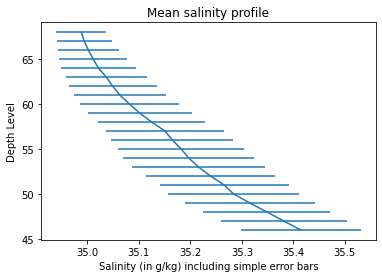

In [ ]:
plt.errorbar(___,___,xerr=___)
plt.xlabel(___)
plt.ylabel(___)
plt.title(___)

Three more plots and we'll be all set! 🙂

**Q7) Account For Missing Data**

The profiles contain many missing values. These are indicated by the special “Not a Number” value, or `np.nan`.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes `NaN`. Instead, if you use the special functions `np.nanmean` and `np.nanstd`, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

Hint: Links to the [`np.nanmean` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) and the [`np.nanstd` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculate the means below ignoring the missing values. We trust that you can now come up with the full syntax yourself 😎

Similarly, recalculate the standard deviations ignoring the missing values.

**Q8) Create a scatter plot of the longitudinal (`lon`) and latitudinal (`lat`) coordinates of the ARGO floats.**

Again, we have not discussed it in the tutorial, but there is a really convenient scatter plot function called [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) provided by the Pyplot interface.

Bonus: Label your figure using `plt.xlabel`, `plt.ylabel`, and `plt.title`.

Bonus 2: Increase the fontsize of your labels by adding a `fontsize=` argument to the label functions.

Bonus 3: Make your scatter plot beautiful by changing the arguments of [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listed in the documentation, for example `s=`.

In [ ]:
plt.scatter(___,___)
___ # Fancy bonuses
___ # More fancy bonuses